In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re
import plotly.express as px

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

# for i, row in enumerate(df["Date"]):
#     p = re.compile(" 00:00:00")
#     datetime = p.split(df["Date"][i])[0]
#     df.iloc[i, 1] = datetime

# fig = make_subplots(
#     rows=3, cols=1,
#     shared_xaxes=True,
#     vertical_spacing=0.03,
#     specs=[[{"type": "table"}],
#            [{"type": "scatter"}],
#            [{"type": "scatter"}]]
# )

In [5]:
df.head(30)

,Unnamed: 0,Date,Number-transactions,Output-volume(BTC),Market-price,Hash-rate,Cost-per-trans-USD,Mining-revenue-USD,Transaction-fees-BTC
0,0,2017-04-29 00:00:00,341319,4488916,3119179,4488916,9,3119179,256
1,1,2017-04-30 00:00:00,281489,3918072,2720216,3918072,10,2720216,199
2,2,2017-05-01 00:00:00,294786,3892124,2878278,3892124,10,2878278,228
3,3,2017-05-02 00:00:00,333161,4099704,3149553,4099704,10,3149553,273
4,4,2017-05-03 00:00:00,295149,3425069,2760373,3425069,10,2760373,247
5,5,2017-05-04 00:00:00,354737,4359179,3500746,4359179,10,3500746,307
6,6,2017-05-05 00:00:00,267193,3347227,2779170,3347227,11,2779170,261
7,7,2017-05-06 00:00:00,363022,4359179,3610789,4359179,10,3610789,297
8,8,2017-05-07 00:00:00,316011,4333232,3505620,4333232,11,3505620,277
9,9,2017-05-08 00:00:00,365096,4670549,4062173,4670549,12,4062173,316


In [6]:
# cut 

In [7]:
df_cut = pd.cut(df["Transaction-fees-BTC"], bins = 10)
df_cut.head()

0    (209.5, 275.0]
1    (144.0, 209.5]
2    (209.5, 275.0]
3    (209.5, 275.0]
4    (209.5, 275.0]
Name: Transaction-fees-BTC, dtype: category
Categories (10, interval[float64]): [(12.345, 78.5] < (78.5, 144.0] < (144.0, 209.5] < (209.5, 275.0] ... (406.0, 471.5] < (471.5, 537.0] < (537.0, 602.5] < (602.5, 668.0]]

In [8]:
# value count

In [12]:
df_value_count = df_cut.value_counts()

In [13]:
df_value_count.head(100)

(144.0, 209.5]    49
(209.5, 275.0]    25
(275.0, 340.5]    24
(78.5, 144.0]     24
(340.5, 406.0]    23
(406.0, 471.5]    17
(471.5, 537.0]     9
(537.0, 602.5]     5
(12.345, 78.5]     2
(602.5, 668.0]     1
Name: Transaction-fees-BTC, dtype: int64

In [15]:
# convert to dataframe with string column 

In [18]:
df_hist = pd.DataFrame(df_value_count)
df_hist = df_hist.reset_index()
df_hist.head()

,index,Transaction-fees-BTC
0,"(144.0, 209.5]",49
1,"(209.5, 275.0]",25
2,"(275.0, 340.5]",24
3,"(78.5, 144.0]",24
4,"(340.5, 406.0]",23


In [19]:
df_hist['index_str'] = df_hist['index'].apply(str)

In [23]:
df_sort = df_hist.sort_values('index')

In [24]:
df_sort.head()

,index,Transaction-fees-BTC,index_str
8,"(12.345, 78.5]",2,"(12.345, 78.5]"
3,"(78.5, 144.0]",24,"(78.5, 144.0]"
0,"(144.0, 209.5]",49,"(144.0, 209.5]"
1,"(209.5, 275.0]",25,"(209.5, 275.0]"
2,"(275.0, 340.5]",24,"(275.0, 340.5]"


In [25]:
df_sort.head()

,index,Transaction-fees-BTC,index_str
8,"(12.345, 78.5]",2,"(12.345, 78.5]"
3,"(78.5, 144.0]",24,"(78.5, 144.0]"
0,"(144.0, 209.5]",49,"(144.0, 209.5]"
1,"(209.5, 275.0]",25,"(209.5, 275.0]"
2,"(275.0, 340.5]",24,"(275.0, 340.5]"


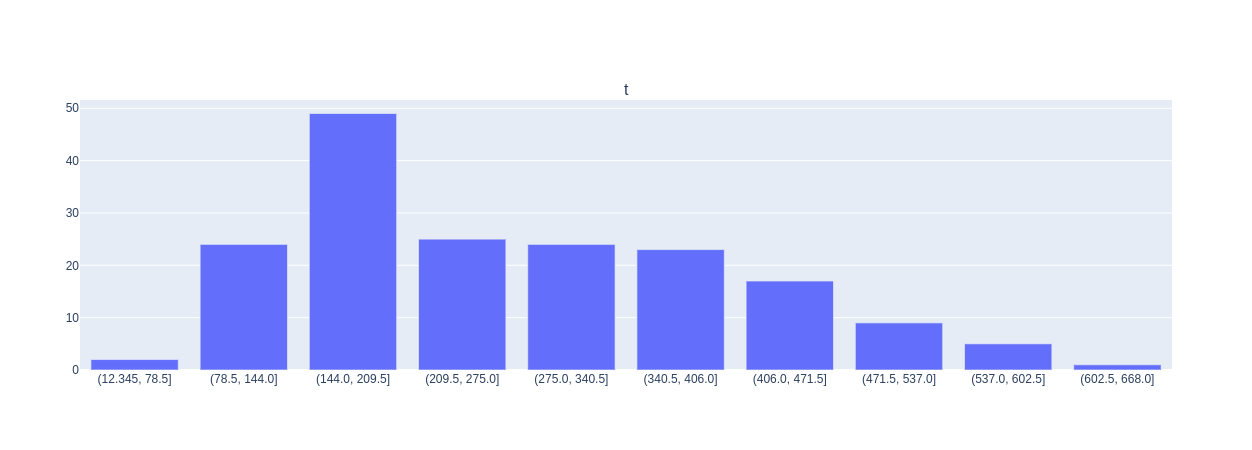

In [39]:
plot = make_subplots(rows=1, cols=1, subplot_titles=('title1'))
plot.add_trace(
    go.Bar(
        x = df_sort['index_str'], 
        y = df_sort['Transaction-fees-BTC'],
        name='Transaction-fees-BTC'
    )
)
plot.show()

In [36]:
?go.Bar

Init signature:
go.Bar(
    arg=None,
    alignmentgroup=None,
    base=None,
    basesrc=None,
    cliponaxis=None,
    constraintext=None,
    customdata=None,
    customdatasrc=None,
    dx=None,
    dy=None,
    error_x=None,
    error_y=None,
    hoverinfo=None,
    hoverinfosrc=None,
    hoverlabel=None,
    hovertemplate=None,
    hovertemplatesrc=None,
    hovertext=None,
    hovertextsrc=None,
    ids=None,
    idssrc=None,
    insidetextanchor=None,
    insidetextfont=None,
    legendgroup=None,
    marker=None,
    meta=None,
    metasrc=None,
    name=None,
    offset=None,
    offsetgroup=None,
    offsetsrc=None,
    opacity=None,
    orientation=None,
    outsidetextfont=None,
    r=None,
    rsrc=None,
    selected=None,
    selectedpoints=None,
    showlegend=None,
    stream=None,
    t=None,
    text=None,
    textangle=None,
    textfont=None,
    textposition=None,
    textpositionsrc=None,
    textsrc=None,
    texttemplate=None,
    texttemplatesrc=None,
    tsrc